# Sparse vs dense matrices

On évalue ici les différences de performance entre des matrices sparse et des matrices denses, notamment en fonction du nombre d'units et de la sparsité dans le réservoir.

On s'intéresse à l'initialisation et au run d'un réservoir.

In [1]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import reservoirpy as rpy 
from reservoirpy.nodes import Reservoir
from reservoirpy import mat_gen

rpy.verbosity(0)

0

In [4]:
# Config
print(
    "ReservoirPy: ", rpy.__version__, '\n'
    "NumPy:", np.__version__,
)

np.show_config()

ReservoirPy:  0.3.11 
NumPy: 1.26.1
Build Dependencies:
  blas:
    detection method: pkgconfig
    found: true
    include directory: /usr/local/include
    lib directory: /usr/local/lib
    name: openblas64
    openblas configuration: USE_64BITINT=1 DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS=
      NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1 USE_OPENMP= HASWELL MAX_THREADS=2
    pc file directory: /usr/local/lib/pkgconfig
    version: 0.3.23.dev
  lapack:
    detection method: internal
    found: true
    include directory: unknown
    lib directory: unknown
    name: dep140250237405136
    openblas configuration: unknown
    pc file directory: unknown
    version: 1.26.1
Compilers:
  c:
    commands: cc
    linker: ld.bfd
    name: gcc
    version: 10.2.1
  c++:
    commands: c++
    linker: ld.bfd
    name: gcc
    version: 10.2.1
  cython:
    commands: cython
    linker: cython
    name: cython
    version: 3.0.3
Machine Information:
  build:
    cpu: x86_64
    endian: little
    family: x

## Fonctions

In [3]:
rpy_sparsity_types = ["csr", "csc", "dense"]
all_sparsity_types=  ["csc", "csr", "bsr", "lil", "dok", "coo", "dia"]

In [13]:
def time_initialization(units, connectivity, sparsity_type, **kwargs):
    t0 = time.time()
    mat = mat_gen.normal(
        units, units, 
        connectivity=connectivity, 
        sparsity_type=sparsity_type,
        **kwargs
    )
    return time.time() - t0

def time_run(units, connectivity, sparsity_type, timesteps, **kwargs):
    W = mat_gen.normal(
        units, units, 
        connectivity=connectivity, 
        sparsity_type=sparsity_type,
        **kwargs
    )
    Win = mat_gen.normal(
        units, 1,
        connectivity=connectivity,
        sparsity_type=sparsity_type,
        **kwargs
    )
    X = np.random.uniform(size=(timesteps, 1))
    reservoir = Reservoir(W=W, Win=Win)
    reservoir.initialize(X)

    t0 = time.time()
    reservoir.run(X)
    return time.time() - t0


## En fonction du `sparsity_type`

On fixe:
- units = 1000
- connectivity = 0.1
- timesteps = 1000

In [8]:
UNITS = 1000
CONNECTIVITY = 0.1
TIMESTEPS = 1000

In [42]:
time_run_type = pd.DataFrame(index=[0])

for i, sparse_type in enumerate(rpy_sparsity_types):
    time_run_type[sparse_type] = time_run(
        units=UNITS,
        connectivity=CONNECTIVITY,
        timesteps=TIMESTEPS,
        sparsity_type=sparse_type,
    )
    print(sparse_type, time_run_type[sparse_type])


Running Reservoir-9:   0%|          | 0/1000 [00:00<?, ?it/s]

Running Reservoir-9: 100%|██████████| 1000/1000 [00:00<00:00, 2815.39it/s]


csr 0    0.357597
Name: csr, dtype: float64


Running Reservoir-10: 100%|██████████| 1000/1000 [00:00<00:00, 3309.87it/s]


csc 0    0.304897
Name: csc, dtype: float64


Running Reservoir-11: 100%|██████████| 1000/1000 [00:00<00:00, 1198.61it/s]

dense 0    0.837334
Name: dense, dtype: float64


In [43]:
time_run_type

,csr,csc,dense
0,0.357597,0.304897,0.837334


## En fonction du nombre de neurones

In [65]:
TRIALS = 20
Ns = np.logspace(1, 4, TRIALS).astype(int)

time_run_units = np.zeros((TRIALS, len(rpy_sparsity_types)))

for i, N in enumerate(Ns):
    for j, sparse_type in enumerate(rpy_sparsity_types):
        time_run_units[i, j] = time_run(
            units=N,
            connectivity=CONNECTIVITY,
            timesteps=TIMESTEPS,
            sparsity_type=sparse_type,
        )
        print(sparse_type, N, time_run_units[i,j])

Running Reservoir-263: 100%|██████████| 1000/1000 [00:00<00:00, 8902.38it/s]


csr 10 0.11421775817871094


Running Reservoir-264: 100%|██████████| 1000/1000 [00:00<00:00, 9213.11it/s]


csc 10 0.11065030097961426


Running Reservoir-265: 100%|██████████| 1000/1000 [00:00<00:00, 9085.31it/s]


dense 10 0.11190104484558105


Running Reservoir-266: 100%|██████████| 1000/1000 [00:00<00:00, 9128.37it/s]


csr 14 0.11130428314208984


Running Reservoir-267: 100%|██████████| 1000/1000 [00:00<00:00, 8640.10it/s]


csc 14 0.11796450614929199


Running Reservoir-268: 100%|██████████| 1000/1000 [00:00<00:00, 10021.90it/s]


dense 14 0.10178112983703613


Running Reservoir-269: 100%|██████████| 1000/1000 [00:00<00:00, 8868.31it/s]


csr 20 0.11511778831481934


Running Reservoir-270: 100%|██████████| 1000/1000 [00:00<00:00, 9342.70it/s]


csc 20 0.10891008377075195


Running Reservoir-271: 100%|██████████| 1000/1000 [00:00<00:00, 8525.41it/s]


dense 20 0.1190793514251709


Running Reservoir-272: 100%|██████████| 1000/1000 [00:00<00:00, 9125.09it/s]


csr 29 0.11177802085876465


Running Reservoir-273: 100%|██████████| 1000/1000 [00:00<00:00, 8971.85it/s]


csc 29 0.11354708671569824


Running Reservoir-274: 100%|██████████| 1000/1000 [00:00<00:00, 9794.74it/s]


dense 29 0.10383772850036621


Running Reservoir-275: 100%|██████████| 1000/1000 [00:00<00:00, 8865.84it/s]


csr 42 0.11460161209106445


Running Reservoir-276: 100%|██████████| 1000/1000 [00:00<00:00, 9088.65it/s]


csc 42 0.11199212074279785


Running Reservoir-277: 100%|██████████| 1000/1000 [00:00<00:00, 9204.82it/s]


dense 42 0.11063671112060547


Running Reservoir-278: 100%|██████████| 1000/1000 [00:00<00:00, 7747.96it/s]


csr 61 0.13088226318359375


Running Reservoir-279: 100%|██████████| 1000/1000 [00:00<00:00, 8834.61it/s]


csc 61 0.11500215530395508


Running Reservoir-280: 100%|██████████| 1000/1000 [00:00<00:00, 9759.12it/s]


dense 61 0.10451960563659668


Running Reservoir-281: 100%|██████████| 1000/1000 [00:00<00:00, 8810.60it/s]


csr 88 0.11540031433105469


Running Reservoir-282: 100%|██████████| 1000/1000 [00:00<00:00, 8753.40it/s]


csc 88 0.11602497100830078


Running Reservoir-283: 100%|██████████| 1000/1000 [00:00<00:00, 9168.50it/s]


dense 88 0.1110222339630127


Running Reservoir-284: 100%|██████████| 1000/1000 [00:00<00:00, 8560.99it/s]


csr 127 0.11882972717285156


Running Reservoir-285: 100%|██████████| 1000/1000 [00:00<00:00, 7071.80it/s]


csc 127 0.14373135566711426


Running Reservoir-286: 100%|██████████| 1000/1000 [00:00<00:00, 5074.35it/s]


dense 127 0.19956469535827637


Running Reservoir-287: 100%|██████████| 1000/1000 [00:00<00:00, 5887.44it/s]


csr 183 0.1723477840423584


Running Reservoir-288: 100%|██████████| 1000/1000 [00:00<00:00, 6673.03it/s]


csc 183 0.15186023712158203


Running Reservoir-289: 100%|██████████| 1000/1000 [00:00<00:00, 4132.86it/s]


dense 183 0.2448101043701172


Running Reservoir-290: 100%|██████████| 1000/1000 [00:00<00:00, 5660.31it/s]


csr 263 0.18304920196533203


Running Reservoir-291: 100%|██████████| 1000/1000 [00:00<00:00, 7183.72it/s]


csc 263 0.14156103134155273


Running Reservoir-292: 100%|██████████| 1000/1000 [00:00<00:00, 3140.45it/s]


dense 263 0.3213517665863037


Running Reservoir-293: 100%|██████████| 1000/1000 [00:00<00:00, 5386.06it/s]


csr 379 0.18872952461242676


Running Reservoir-294: 100%|██████████| 1000/1000 [00:00<00:00, 6432.41it/s]


csc 379 0.15724658966064453


Running Reservoir-295: 100%|██████████| 1000/1000 [00:00<00:00, 2989.14it/s]


dense 379 0.33783984184265137


Running Reservoir-296: 100%|██████████| 1000/1000 [00:00<00:00, 4439.87it/s]


csr 545 0.22851204872131348


Running Reservoir-297: 100%|██████████| 1000/1000 [00:00<00:00, 5131.46it/s]


csc 545 0.19744157791137695


Running Reservoir-298: 100%|██████████| 1000/1000 [00:00<00:00, 2381.27it/s]


dense 545 0.42239952087402344


Running Reservoir-299: 100%|██████████| 1000/1000 [00:00<00:00, 3507.68it/s]


csr 784 0.2884540557861328


Running Reservoir-300: 100%|██████████| 1000/1000 [00:00<00:00, 4035.65it/s]


csc 784 0.25069093704223633


Running Reservoir-301: 100%|██████████| 1000/1000 [00:00<00:00, 2522.71it/s]


dense 784 0.3990795612335205


Running Reservoir-302: 100%|██████████| 1000/1000 [00:00<00:00, 2384.31it/s]


csr 1128 0.4224221706390381


Running Reservoir-303: 100%|██████████| 1000/1000 [00:00<00:00, 2750.63it/s]


csc 1128 0.3661153316497803


Running Reservoir-304: 100%|██████████| 1000/1000 [00:00<00:00, 1598.13it/s]


dense 1128 0.6308128833770752


Running Reservoir-305: 100%|██████████| 1000/1000 [00:00<00:00, 1463.17it/s]


csr 1623 0.687401294708252


Running Reservoir-306: 100%|██████████| 1000/1000 [00:00<00:00, 1930.27it/s]


csc 1623 0.5206394195556641


Running Reservoir-307: 100%|██████████| 1000/1000 [00:01<00:00, 703.31it/s]


dense 1623 1.4253184795379639


Running Reservoir-308: 100%|██████████| 1000/1000 [00:01<00:00, 802.37it/s]


csr 2335 1.2490427494049072


Running Reservoir-309: 100%|██████████| 1000/1000 [00:00<00:00, 1006.12it/s]


csc 2335 0.996915340423584


Running Reservoir-310: 100%|██████████| 1000/1000 [00:03<00:00, 300.37it/s]


dense 2335 3.333381414413452


Running Reservoir-311: 100%|██████████| 1000/1000 [00:02<00:00, 411.19it/s]


csr 3359 2.4342119693756104


Running Reservoir-312: 100%|██████████| 1000/1000 [00:01<00:00, 533.45it/s]


csc 3359 1.8765161037445068


Running Reservoir-313: 100%|██████████| 1000/1000 [00:04<00:00, 219.24it/s]


dense 3359 4.56498646736145


Running Reservoir-314: 100%|██████████| 1000/1000 [00:04<00:00, 206.84it/s]


csr 4832 4.836501598358154


Running Reservoir-315: 100%|██████████| 1000/1000 [00:04<00:00, 247.57it/s]


csc 4832 4.041467189788818


Running Reservoir-316: 100%|██████████| 1000/1000 [00:08<00:00, 113.80it/s]


dense 4832 8.792779207229614


Running Reservoir-317: 100%|██████████| 1000/1000 [00:09<00:00, 101.86it/s]


csr 6951 9.820070505142212


Running Reservoir-318: 100%|██████████| 1000/1000 [00:08<00:00, 112.29it/s]


csc 6951 8.907611608505249


Running Reservoir-319: 100%|██████████| 1000/1000 [00:18<00:00, 54.60it/s]


dense 6951 18.32101058959961


Running Reservoir-320: 100%|██████████| 1000/1000 [00:19<00:00, 51.77it/s]


csr 10000 19.318288326263428


Running Reservoir-321: 100%|██████████| 1000/1000 [00:17<00:00, 56.44it/s]


csc 10000 17.720418453216553


Running Reservoir-322: 100%|██████████| 1000/1000 [00:33<00:00, 29.58it/s]


dense 10000 33.81033277511597


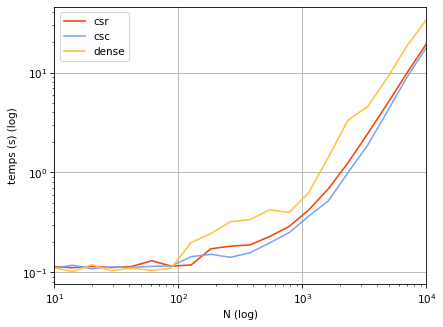

In [243]:
Ns = np.logspace(1, 4, 20).astype(int)

plt.figure()

for i, s_type in enumerate(rpy_sparsity_types):
    plt.plot(Ns, time_run_units[:, i], label=s_type)

plt.legend()
plt.grid()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N (log)")
plt.ylabel("temps (s) (log)")
plt.show()

## En fonction de la connectivité

In [76]:
TRIALS = 20
UNITS = 5_000
TIMESTEPS = 100
Cs = np.linspace(0, 1, TRIALS)

time_run_connectivity = np.zeros((TRIALS, 2))

for i, C in enumerate(Cs):
    for j, sparse_type in enumerate(["csc", "csr"]):
        time_run_connectivity[i, j] = time_run(
            units=UNITS,
            connectivity=C,
            timesteps=TIMESTEPS,
            sparsity_type=sparse_type,
        )
        print(sparse_type, C, time_run_connectivity[i,j])

Running Reservoir-409: 100%|██████████| 100/100 [00:00<00:00, 1926.26it/s]


csc 0.0 0.0539395809173584


Running Reservoir-410: 100%|██████████| 100/100 [00:00<00:00, 1946.69it/s]


csr 0.0 0.05412912368774414


Running Reservoir-411: 100%|██████████| 100/100 [00:00<00:00, 376.81it/s]


csc 0.05263157894736842 0.26739501953125


Running Reservoir-412: 100%|██████████| 100/100 [00:00<00:00, 348.62it/s]


csr 0.05263157894736842 0.2890000343322754


Running Reservoir-413: 100%|██████████| 100/100 [00:00<00:00, 219.07it/s]


csc 0.10526315789473684 0.45842957496643066


Running Reservoir-414: 100%|██████████| 100/100 [00:00<00:00, 183.61it/s]


csr 0.10526315789473684 0.5463957786560059


Running Reservoir-415: 100%|██████████| 100/100 [00:00<00:00, 142.98it/s]


csc 0.15789473684210525 0.7017719745635986


Running Reservoir-416: 100%|██████████| 100/100 [00:00<00:00, 125.01it/s]


csr 0.15789473684210525 0.8019893169403076


Running Reservoir-417: 100%|██████████| 100/100 [00:00<00:00, 107.95it/s]


csc 0.21052631578947367 0.9282784461975098


Running Reservoir-418: 100%|██████████| 100/100 [00:01<00:00, 95.52it/s]


csr 0.21052631578947367 1.049013376235962


Running Reservoir-419: 100%|██████████| 100/100 [00:01<00:00, 92.00it/s]


csc 0.2631578947368421 1.0889220237731934


Running Reservoir-420: 100%|██████████| 100/100 [00:01<00:00, 76.86it/s]


csr 0.2631578947368421 1.3030612468719482


Running Reservoir-421: 100%|██████████| 100/100 [00:01<00:00, 78.35it/s]


csc 0.3157894736842105 1.2782015800476074


Running Reservoir-422: 100%|██████████| 100/100 [00:01<00:00, 64.89it/s]


csr 0.3157894736842105 1.543065071105957


Running Reservoir-423: 100%|██████████| 100/100 [00:01<00:00, 68.95it/s]


csc 0.3684210526315789 1.4520666599273682


Running Reservoir-424: 100%|██████████| 100/100 [00:01<00:00, 56.16it/s]


csr 0.3684210526315789 1.7824101448059082


Running Reservoir-425: 100%|██████████| 100/100 [00:01<00:00, 62.35it/s]


csc 0.42105263157894735 1.6057262420654297


Running Reservoir-426: 100%|██████████| 100/100 [00:02<00:00, 49.07it/s]


csr 0.42105263157894735 2.039982795715332


Running Reservoir-427: 100%|██████████| 100/100 [00:01<00:00, 55.86it/s]


csc 0.47368421052631576 1.7931416034698486


Running Reservoir-428: 100%|██████████| 100/100 [00:02<00:00, 44.71it/s]


csr 0.47368421052631576 2.2385659217834473


Running Reservoir-429: 100%|██████████| 100/100 [00:01<00:00, 51.58it/s]


csc 0.5263157894736842 1.9405851364135742


Running Reservoir-430: 100%|██████████| 100/100 [00:02<00:00, 40.40it/s]


csr 0.5263157894736842 2.4772613048553467


Running Reservoir-431: 100%|██████████| 100/100 [00:02<00:00, 45.87it/s]


csc 0.5789473684210527 2.1821258068084717


Running Reservoir-432: 100%|██████████| 100/100 [00:02<00:00, 36.95it/s]


csr 0.5789473684210527 2.708059310913086


Running Reservoir-433: 100%|██████████| 100/100 [00:02<00:00, 46.03it/s]


csc 0.631578947368421 2.17441463470459


Running Reservoir-434: 100%|██████████| 100/100 [00:02<00:00, 33.95it/s]


csr 0.631578947368421 2.9472320079803467


Running Reservoir-435: 100%|██████████| 100/100 [00:02<00:00, 42.71it/s]


csc 0.6842105263157894 2.343146324157715


Running Reservoir-436: 100%|██████████| 100/100 [00:03<00:00, 31.38it/s]


csr 0.6842105263157894 3.1884708404541016


Running Reservoir-437: 100%|██████████| 100/100 [00:02<00:00, 40.38it/s]


csc 0.7368421052631579 2.478257656097412


Running Reservoir-438: 100%|██████████| 100/100 [00:03<00:00, 29.11it/s]


csr 0.7368421052631579 3.437523126602173


Running Reservoir-439: 100%|██████████| 100/100 [00:02<00:00, 37.88it/s]


csc 0.7894736842105263 2.642082452774048


Running Reservoir-440: 100%|██████████| 100/100 [00:03<00:00, 27.15it/s]


csr 0.7894736842105263 3.685088634490967


Running Reservoir-441: 100%|██████████| 100/100 [00:02<00:00, 36.34it/s]


csc 0.8421052631578947 2.754024028778076


Running Reservoir-442: 100%|██████████| 100/100 [00:03<00:00, 25.53it/s]


csr 0.8421052631578947 3.9187705516815186


Running Reservoir-443: 100%|██████████| 100/100 [00:02<00:00, 34.61it/s]


csc 0.894736842105263 2.8910627365112305


Running Reservoir-444: 100%|██████████| 100/100 [00:04<00:00, 24.04it/s]


csr 0.894736842105263 4.161093473434448


Running Reservoir-445: 100%|██████████| 100/100 [00:03<00:00, 32.54it/s]


csc 0.9473684210526315 3.0748188495635986


Running Reservoir-446: 100%|██████████| 100/100 [00:04<00:00, 22.63it/s]


csr 0.9473684210526315 4.420909643173218


Running Reservoir-447: 100%|██████████| 100/100 [00:01<00:00, 94.56it/s]


csc 1.0 1.0597989559173584


Running Reservoir-448: 100%|██████████| 100/100 [00:00<00:00, 105.43it/s]

csr 1.0 0.951653242111206


In [78]:
time_dense = time_run(
    units=UNITS,
    connectivity=1.,
    timesteps=TIMESTEPS,
    sparsity_type="dense",
)

Running Reservoir-449: 100%|██████████| 100/100 [00:01<00:00, 98.97it/s]


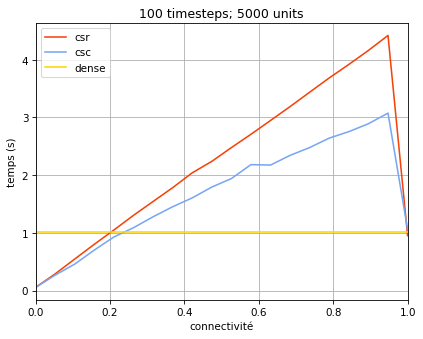

In [255]:
plt.figure()

# for i, s_type in enumerate(["csc", "csr"]):
#     plt.plot(Cs, time_run_connectivity[:, i], label=s_type)

plt.plot(Cs, time_run_connectivity[:, 1], label="csr")
plt.plot(Cs, time_run_connectivity[:, 0], label="csc")

plt.axhline(time_dense, color="gold", label="dense")
plt.legend()
plt.xlabel("connectivité")
plt.ylabel("temps (s)")
plt.grid()
plt.title(f"{100} timesteps; {5_000} units")
plt.show()

In [80]:
Cs

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [81]:
TRIALS = 20
UNITS = 10_000
TIMESTEPS = 100
Cs = np.linspace(0, 1, TRIALS)

time_run_connectivity2 = np.zeros((TRIALS, 2))

for i, C in enumerate(Cs):
    for j, sparse_type in enumerate(["csc", "csr"]):
        time_run_connectivity2[i, j] = time_run(
            units=UNITS,
            connectivity=C,
            timesteps=TIMESTEPS,
            sparsity_type=sparse_type,
        )
        print(sparse_type, C, time_run_connectivity2[i,j])

Running Reservoir-450: 100%|██████████| 100/100 [00:00<00:00, 1137.26it/s]


csc 0.0 0.09004521369934082


Running Reservoir-451: 100%|██████████| 100/100 [00:00<00:00, 1104.05it/s]


csr 0.0 0.0931084156036377


Running Reservoir-452: 100%|██████████| 100/100 [00:01<00:00, 98.79it/s]


csc 0.05263157894736842 1.0144352912902832


Running Reservoir-453: 100%|██████████| 100/100 [00:01<00:00, 92.54it/s]


csr 0.05263157894736842 1.082592487335205


Running Reservoir-454: 100%|██████████| 100/100 [00:01<00:00, 53.02it/s]


csc 0.10526315789473684 1.8876731395721436


Running Reservoir-455: 100%|██████████| 100/100 [00:02<00:00, 47.67it/s]


csr 0.10526315789473684 2.1001434326171875


Running Reservoir-456: 100%|██████████| 100/100 [00:02<00:00, 38.16it/s]


csc 0.15789473684210525 2.6227612495422363


Running Reservoir-457: 100%|██████████| 100/100 [00:03<00:00, 33.31it/s]


csr 0.15789473684210525 3.00433349609375


Running Reservoir-458: 100%|██████████| 100/100 [00:03<00:00, 29.53it/s]


csc 0.21052631578947367 3.3883326053619385


Running Reservoir-459: 100%|██████████| 100/100 [00:03<00:00, 25.26it/s]


csr 0.21052631578947367 3.9607527256011963


Running Reservoir-460: 100%|██████████| 100/100 [00:04<00:00, 24.40it/s]


csc 0.2631578947368421 4.10032320022583


Running Reservoir-461: 100%|██████████| 100/100 [00:04<00:00, 20.34it/s]


csr 0.2631578947368421 4.919238805770874


Running Reservoir-462: 100%|██████████| 100/100 [00:04<00:00, 20.71it/s]


csc 0.3157894736842105 4.831725358963013


Running Reservoir-463: 100%|██████████| 100/100 [00:05<00:00, 16.90it/s]


csr 0.3157894736842105 5.919601678848267


Running Reservoir-464: 100%|██████████| 100/100 [00:05<00:00, 18.14it/s]


csc 0.3684210526315789 5.515484094619751


Running Reservoir-465: 100%|██████████| 100/100 [00:06<00:00, 14.58it/s]


csr 0.3684210526315789 6.859013080596924


Running Reservoir-466: 100%|██████████| 100/100 [00:06<00:00, 16.20it/s]


csc 0.42105263157894735 6.175211191177368


Running Reservoir-467: 100%|██████████| 100/100 [00:07<00:00, 12.76it/s]


csr 0.42105263157894735 7.83911657333374


Running Reservoir-468: 100%|██████████| 100/100 [00:06<00:00, 14.76it/s]


csc 0.47368421052631576 6.776411533355713


Running Reservoir-469: 100%|██████████| 100/100 [00:08<00:00, 11.39it/s]


csr 0.47368421052631576 8.783846139907837


Running Reservoir-470: 100%|██████████| 100/100 [00:07<00:00, 13.60it/s]


csc 0.5263157894736842 7.357495069503784


Running Reservoir-471: 100%|██████████| 100/100 [00:09<00:00, 10.26it/s]


csr 0.5263157894736842 9.750266790390015


Running Reservoir-472: 100%|██████████| 100/100 [00:08<00:00, 12.40it/s]


csc 0.5789473684210527 8.064465522766113


Running Reservoir-473: 100%|██████████| 100/100 [00:10<00:00,  9.30it/s]


csr 0.5789473684210527 10.750977993011475


Running Reservoir-474: 100%|██████████| 100/100 [00:08<00:00, 11.61it/s]


csc 0.631578947368421 8.61476731300354


Running Reservoir-475: 100%|██████████| 100/100 [00:11<00:00,  8.55it/s]


csr 0.631578947368421 11.701122760772705


Running Reservoir-476: 100%|██████████| 100/100 [00:09<00:00, 10.92it/s]


csc 0.6842105263157894 9.162547826766968


Running Reservoir-477: 100%|██████████| 100/100 [00:12<00:00,  7.90it/s]


csr 0.6842105263157894 12.66156792640686


Running Reservoir-478: 100%|██████████| 100/100 [00:09<00:00, 10.28it/s]


csc 0.7368421052631579 9.727346181869507


Running Reservoir-479: 100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


csr 0.7368421052631579 13.609625339508057


Running Reservoir-480: 100%|██████████| 100/100 [00:10<00:00,  9.59it/s]


csc 0.7894736842105263 10.434915781021118


Running Reservoir-481: 100%|██████████| 100/100 [00:14<00:00,  6.87it/s]


csr 0.7894736842105263 14.554413318634033


Running Reservoir-482: 100%|██████████| 100/100 [00:10<00:00,  9.10it/s]


csc 0.8421052631578947 10.99133586883545


Running Reservoir-483: 100%|██████████| 100/100 [00:15<00:00,  6.41it/s]


csr 0.8421052631578947 15.606390714645386


Running Reservoir-484: 100%|██████████| 100/100 [00:11<00:00,  8.48it/s]


csc 0.894736842105263 11.792452573776245


Running Reservoir-485: 100%|██████████| 100/100 [00:16<00:00,  6.04it/s]


csr 0.894736842105263 16.564358472824097


Running Reservoir-486: 100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


csc 0.9473684210526315 12.202690362930298


Running Reservoir-487: 100%|██████████| 100/100 [00:17<00:00,  5.72it/s]


csr 0.9473684210526315 17.47203516960144


Running Reservoir-488: 100%|██████████| 100/100 [00:03<00:00, 31.27it/s]


csc 1.0 3.2005653381347656


Running Reservoir-489: 100%|██████████| 100/100 [00:03<00:00, 31.78it/s]

csr 1.0 3.1509554386138916


In [82]:
time_dense_ = time_run(
    units=UNITS,
    connectivity=1.,
    timesteps=TIMESTEPS,
    sparsity_type="dense",
)

Running Reservoir-490: 100%|██████████| 100/100 [00:03<00:00, 29.96it/s]


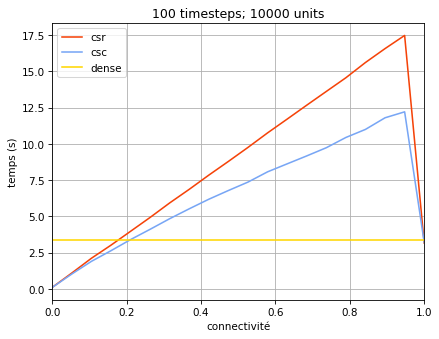

In [254]:
plt.figure()

# for i, s_type in enumerate(["csc", "csr"]):
#     plt.plot(Cs, time_run_connectivity2[:, i], label=s_type)


plt.plot(Cs, time_run_connectivity2[:, 1], label="csr")
plt.plot(Cs, time_run_connectivity2[:, 0], label="csc")

plt.axhline(time_dense_, color="gold", label="dense")
plt.grid()
plt.legend()
plt.xlabel("connectivité")
plt.ylabel("temps (s)")
plt.title(f"{100} timesteps; {10_000} units")
plt.show()

In [93]:
TRIALS = 20
UNITS = 500
TIMESTEPS = 1000
Cs = np.linspace(0, 1, TRIALS)

time_run_connectivity3 = np.zeros((TRIALS, 2))

for i, C in enumerate(Cs):
    for j, sparse_type in enumerate(["csc", "csr"]):
        time_run_connectivity3[i, j] = time_run(
            units=UNITS,
            connectivity=C,
            timesteps=TIMESTEPS,
            sparsity_type=sparse_type,
        )
        print(sparse_type, C, time_run_connectivity3[i,j])

time_dense3 = time_run(
    units=UNITS,
    connectivity=1.,
    timesteps=TIMESTEPS,
    sparsity_type="dense",
)

Running Reservoir-532: 100%|██████████| 1000/1000 [00:00<00:00, 5601.65it/s]


csc 0.0 0.18056225776672363


Running Reservoir-533: 100%|██████████| 1000/1000 [00:00<00:00, 6858.14it/s]


csr 0.0 0.1479473114013672


Running Reservoir-534: 100%|██████████| 1000/1000 [00:00<00:00, 6180.05it/s]


csc 0.05263157894736842 0.16426753997802734


Running Reservoir-535: 100%|██████████| 1000/1000 [00:00<00:00, 6145.38it/s]


csr 0.05263157894736842 0.16513371467590332


Running Reservoir-536: 100%|██████████| 1000/1000 [00:00<00:00, 5497.59it/s]


csc 0.10526315789473684 0.1846630573272705


Running Reservoir-537: 100%|██████████| 1000/1000 [00:00<00:00, 5553.21it/s]


csr 0.10526315789473684 0.18223905563354492


Running Reservoir-538: 100%|██████████| 1000/1000 [00:00<00:00, 4277.71it/s]


csc 0.15789473684210525 0.2360525131225586


Running Reservoir-539: 100%|██████████| 1000/1000 [00:00<00:00, 4654.29it/s]


csr 0.15789473684210525 0.21708083152770996


Running Reservoir-540: 100%|██████████| 1000/1000 [00:00<00:00, 4552.85it/s]


csc 0.21052631578947367 0.2222602367401123


Running Reservoir-541: 100%|██████████| 1000/1000 [00:00<00:00, 4193.06it/s]


csr 0.21052631578947367 0.2409830093383789


Running Reservoir-542: 100%|██████████| 1000/1000 [00:00<00:00, 4433.12it/s]


csc 0.2631578947368421 0.22786784172058105


Running Reservoir-543: 100%|██████████| 1000/1000 [00:00<00:00, 3702.43it/s]


csr 0.2631578947368421 0.2724928855895996


Running Reservoir-544: 100%|██████████| 1000/1000 [00:00<00:00, 4085.54it/s]


csc 0.3157894736842105 0.24703001976013184


Running Reservoir-545: 100%|██████████| 1000/1000 [00:00<00:00, 3562.86it/s]


csr 0.3157894736842105 0.2828831672668457


Running Reservoir-546: 100%|██████████| 1000/1000 [00:00<00:00, 3875.09it/s]


csc 0.3684210526315789 0.26040101051330566


Running Reservoir-547: 100%|██████████| 1000/1000 [00:00<00:00, 3126.20it/s]


csr 0.3684210526315789 0.32270073890686035


Running Reservoir-548: 100%|██████████| 1000/1000 [00:00<00:00, 3715.17it/s]


csc 0.42105263157894735 0.27141833305358887


Running Reservoir-549: 100%|██████████| 1000/1000 [00:00<00:00, 3026.18it/s]


csr 0.42105263157894735 0.3327963352203369


Running Reservoir-550: 100%|██████████| 1000/1000 [00:00<00:00, 3554.22it/s]


csc 0.47368421052631576 0.28405308723449707


Running Reservoir-551: 100%|██████████| 1000/1000 [00:00<00:00, 2871.31it/s]


csr 0.47368421052631576 0.3508777618408203


Running Reservoir-552: 100%|██████████| 1000/1000 [00:00<00:00, 3143.85it/s]


csc 0.5263157894736842 0.32034826278686523


Running Reservoir-553: 100%|██████████| 1000/1000 [00:00<00:00, 2666.36it/s]


csr 0.5263157894736842 0.3774144649505615


Running Reservoir-554: 100%|██████████| 1000/1000 [00:00<00:00, 3313.16it/s]


csc 0.5789473684210527 0.30417490005493164


Running Reservoir-555: 100%|██████████| 1000/1000 [00:00<00:00, 2539.88it/s]


csr 0.5789473684210527 0.3959488868713379


Running Reservoir-556: 100%|██████████| 1000/1000 [00:00<00:00, 3011.12it/s]


csc 0.631578947368421 0.33447933197021484


Running Reservoir-557: 100%|██████████| 1000/1000 [00:00<00:00, 2285.68it/s]


csr 0.631578947368421 0.4404118061065674


Running Reservoir-558: 100%|██████████| 1000/1000 [00:00<00:00, 2880.46it/s]


csc 0.6842105263157894 0.34926891326904297


Running Reservoir-559: 100%|██████████| 1000/1000 [00:00<00:00, 2208.82it/s]


csr 0.6842105263157894 0.45493602752685547


Running Reservoir-560: 100%|██████████| 1000/1000 [00:00<00:00, 2924.02it/s]


csc 0.7368421052631579 0.34439897537231445


Running Reservoir-561: 100%|██████████| 1000/1000 [00:00<00:00, 2178.24it/s]


csr 0.7368421052631579 0.461409330368042


Running Reservoir-562: 100%|██████████| 1000/1000 [00:00<00:00, 2682.95it/s]


csc 0.7894736842105263 0.3752737045288086


Running Reservoir-563: 100%|██████████| 1000/1000 [00:00<00:00, 2099.49it/s]


csr 0.7894736842105263 0.47854113578796387


Running Reservoir-564: 100%|██████████| 1000/1000 [00:00<00:00, 2695.80it/s]


csc 0.8421052631578947 0.37322449684143066


Running Reservoir-565: 100%|██████████| 1000/1000 [00:00<00:00, 1951.80it/s]


csr 0.8421052631578947 0.5150163173675537


Running Reservoir-566: 100%|██████████| 1000/1000 [00:00<00:00, 2404.27it/s]


csc 0.894736842105263 0.41813087463378906


Running Reservoir-567: 100%|██████████| 1000/1000 [00:00<00:00, 1834.75it/s]


csr 0.894736842105263 0.5477359294891357


Running Reservoir-568: 100%|██████████| 1000/1000 [00:00<00:00, 2400.42it/s]


csc 0.9473684210526315 0.4192230701446533


Running Reservoir-569: 100%|██████████| 1000/1000 [00:00<00:00, 1841.62it/s]


csr 0.9473684210526315 0.5454134941101074


Running Reservoir-570: 100%|██████████| 1000/1000 [00:00<00:00, 2114.31it/s]


csc 1.0 0.475445032119751


Running Reservoir-571: 100%|██████████| 1000/1000 [00:00<00:00, 2436.01it/s]


csr 1.0 0.4141194820404053


Running Reservoir-572: 100%|██████████| 1000/1000 [00:00<00:00, 2638.33it/s]


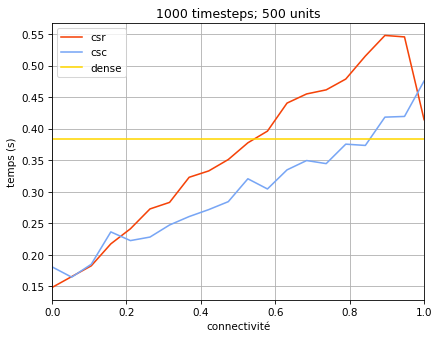

In [257]:
plt.figure()

# for i, s_type in enumerate(["csc", "csr"]):
#     plt.plot(Cs, time_run_connectivity3[:, i], label=s_type)

plt.plot(Cs, time_run_connectivity3[:, 1], label="csr")
plt.plot(Cs, time_run_connectivity3[:, 0], label="csc")

plt.axhline(time_dense3, color="gold", label="dense")
plt.legend()
plt.grid()
plt.xlabel("connectivité")
plt.ylabel("temps (s)")
plt.title(f"{1000} timesteps; {500} units")
plt.show()

### Connectivité à temps équivalent

On s'intéresse à la sparsité `csc` qui semble systématiquement plus performante que la `csr`.

L'idée est de trouver la connectivité d'une matrice sparse à partir de laquelle il est plus intéressant de choisir une matrice dense.

Pour ça, on fait une recherche par dichotomie.

In [180]:
np.median([time_run(100, connectivity=1., sparsity_type="dense", timesteps=500,) for _ in range(10)])

0.13842427730560303

In [207]:
def dichotomy(units, timesteps=500):
    dense_instances = [time_run(units, connectivity=1., sparsity_type="dense", timesteps=timesteps) for _ in range(20)]
    print(units, timesteps, np.median(dense_instances), np.var(dense_instances))
    dense_time = np.median(dense_instances)

    # csc_dense_time = time_run(units, connectivity=.99, sparsity_type="csc", timesteps=timesteps)
    # if csc_dense_time > dense_time:
    #     print(units, 1., csc_dense_time, dense_time)
    #     return 1.
    
    min_ = 0.
    max_ = 1.
    current_time = np.Infinity
    iters = 0

    while np.abs(dense_time - current_time) > dense_time/50: # 10% de précision
        connectivity = 0.5 * max_ + 0.5 * min_ # 
        current_time = time_run(units, connectivity=connectivity, sparsity_type="csc", timesteps=timesteps)

        if current_time > dense_time:
            max_ = connectivity
        else:
            min_ = connectivity
        iters += 1
    
    print(units, connectivity, current_time)
    return connectivity



In [200]:
# variabilité du temps avec matrice dense
[time_run(1000, connectivity=.01, sparsity_type="dense", timesteps=500) for _ in range(10)]

[0.3366713523864746,
 0.17390108108520508,
 0.29562854766845703,
 0.22339463233947754,
 0.409806489944458,
 0.23465442657470703,
 0.23993778228759766,
 0.4596705436706543,
 0.22728729248046875,
 0.19460034370422363]

In [208]:
Ns = np.logspace(2.5, 4.5, 10).astype(int)

connectivity = [dichotomy(N, timesteps=int(1e6/N)) for N in Ns]

316 3164 0.8479450941085815 0.023334840822190586
316 1.0 0.857865571975708
527 1897 0.5202991962432861 0.004513976342839641
527 0.4375 0.5222139358520508
879 1137 0.4082808494567871 0.002215937723391761
879 0.234375 0.40743088722229004
1467 681 0.5726794004440308 0.01903448293396238
1467 0.25 0.5622739791870117
2448 408 1.0329759120941162 0.019504263903926358
2448 0.28125 1.021470069885254
4084 244 1.6626325845718384 0.014658538401141069
4084 0.25 1.6465532779693604
6812 146 2.2370362281799316 0.0019540996544689902
6812 0.203125 2.1999101638793945
11364 87 3.4988508224487305 0.016709527591986413
11364 0.1953125 3.4896910190582275
18957 52 5.667017102241516 0.0031993797485591812
18957 0.17578125 5.654384613037109
31622 31 9.222190856933594 0.0011600375005598094
31622 0.1328125 9.384227752685547


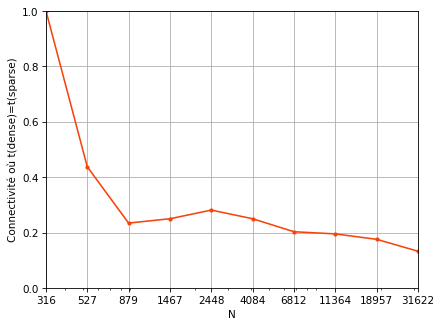

In [214]:
plt.figure()

plt.plot(Ns, connectivity, '.-')
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Connectivité où t(dense)=t(sparse)")
plt.xticks(Ns, Ns)
plt.grid()
plt.ylim(0, 1)

plt.show()